# QUESTION 1


Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import urllib

Step 2. Import the dataset from this address

In [2]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

Step 3. Assign it to a variable called users

In [3]:
users = pd.read_csv(url)
arr = users['user_id|age|gender|occupation|zip_code'].str.split('|',expand = True)
users['user_id'] = arr[0]
users['age']=arr[1]
users['gender']=arr[2]
users['occupation']=arr[3]
users['zip_code']=arr[4]
users.drop(columns = ['user_id|age|gender|occupation|zip_code'], inplace = True)
users['age']=users['age'].astype(int)
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Step 4. Discover what is the mean age per occupation

In [6]:
users.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [7]:
maleRatio = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)

total = maleRatio[['F', 'M']].sum(axis=1)
maleRatio['MaleRatio'] = 100 * maleRatio['M'] / total

maleRatio = maleRatio['MaleRatio'].sort_values(ascending=False)
# result
maleRatio

occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
Name: MaleRatio, dtype: float64

Step 6. For each occupation, calculate the minimum and maximum ages

In [8]:
users.groupby('occupation')['age'].agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


Step 7. For each combination of occupation and sex, calculate the mean age

In [9]:
users.groupby(['occupation', 'gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

Step 8. For each occupation present the percentage of women and men

In [10]:
GenderOccupation = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occupationCount = users.groupby(['occupation']).agg('count')
occupationCount
GenderPercentage = GenderOccupation.div(occupationCount, level = "occupation") * 100
GenderPercentage.loc[:,'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# QUESTION 2

Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team

In [11]:
import pandas as pd

Step 2. Import the dataset from this address.

In [12]:
url1 = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

Step 3. Assign it to a variable called euro12

In [13]:
euro12 = pd.read_csv(url1)
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


Step 4. Select only the Goal column

In [14]:
euro12["Goals"]

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Step 5. How many team participated in the Euro2012?

In [15]:
teamsCount = len(euro12)
teamsCount

16

Step 6. What is the number of columns in the dataset?

In [16]:
euro12.shape[1]

35

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [17]:
discipline=pd.DataFrame({'Team':euro12['Team'], 'Yellow Cards': euro12['Yellow Cards'],'Red Cards': euro12['Red Cards']})
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [18]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = True)

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


Step 9. Calculate the mean Yellow Cards given per Team

In [19]:
perteam= pd.DataFrame(euro12.groupby(['Team'])['Yellow Cards'].mean())
perteam

,Yellow Cards
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


Step 10. Filter teams that scored more than 6 goalsStep

In [20]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


Step 11. Select the teams that start with G

In [21]:
gteams=euro12[euro12['Team'].str.startswith('G')]
gteams

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 12. Select the first 7 columns

In [22]:
euro12[euro12.columns[0:7]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


Step 13. Select all columns except the last 3

In [23]:
euro12.iloc[:,0:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [24]:
Countries = euro12[euro12.Team.isin(['England','Italy','Russia'])]
Countries[['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

Step 1. Import the necessary libraries

In [25]:
import numpy as np
import pandas as pd

Step 2. Create 3 differents Series, each of length 100, as follows:

A. The first a random number from 1 to 4

In [26]:
firstno = pd.Series(np.random.randint(1, high=5, size=100))
print (firstno)

0     2
1     3
2     3
3     3
4     1
     ..
95    1
96    4
97    1
98    1
99    2
Length: 100, dtype: int32


B. The second a random number from 1 to 3

In [27]:
secondno = pd.Series(np.random.randint(1, high=4, size=100))
print (secondno)

0     1
1     1
2     3
3     2
4     3
     ..
95    3
96    3
97    1
98    2
99    1
Length: 100, dtype: int32


C. The third a random number from 10,000 to 30,000

In [28]:
thirdno = pd.Series(np.random.randint(10000, high=30001, size=100))
print(thirdno)

0     14619
1     28118
2     22629
3     26702
4     18285
      ...  
95    25289
96    22794
97    24378
98    27973
99    26008
Length: 100, dtype: int32


Step 3. Create a DataFrame by joinning the Series by column

In [29]:
DF = pd.DataFrame({'firstno': firstno,'secondno':secondno,'thirdno':thirdno})
DF.head()

,firstno,secondno,thirdno
0,2,1,14619
1,3,1,28118
2,3,3,22629
3,3,2,26702
4,1,3,18285


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [30]:
newcol = DF.rename(columns = {'firstno':'bedrs','secondno':'bathrs','thirdno':'price_sqr_meter'})
newcol.head()

,bedrs,bathrs,price_sqr_meter
0,2,1,14619
1,3,1,28118
2,3,3,22629
3,3,2,26702
4,1,3,18285


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [31]:
df_new = newcol.bedrs.astype(str).str.cat(newcol.bathrs.astype(str)).str.cat(newcol.price_sqr_meter.astype(str))
df_new.columns = ['bigcolumn']
df_new

0     2114619
1     3128118
2     3322629
3     3226702
4     1318285
       ...   
95    1325289
96    4322794
97    1124378
98    1227973
99    2126008
Name: bedrs, Length: 100, dtype: object

Step 6. Ops it seems it is going only until index 99. Is it true?

yes, it is going until index 99 as demonstrated above. It does not go above that.

Step 7. Reindex the DataFrame so it goes from 0 to 299

In [32]:
df_new = df_new.reset_index(drop=True)

df_new.reset_index()

df_new.reindex(index=range(0,299))

0      2114619
1      3128118
2      3322629
3      3226702
4      1318285
        ...   
294        NaN
295        NaN
296        NaN
297        NaN
298        NaN
Name: bedrs, Length: 299, dtype: object

# QUESTION 4

Wind Statistics The data have been modified to contain some missing values, identified by NaN. Using pandas should make this exercise easier, in particular for the bonus question. You should be able to perform all of these operations without using a for loop or other looping construct. The data in 'wind.data' has the following format: Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL 61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04 61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83 61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71 The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day. Step 1. Import the necessary libraries Step 2. Import the dataset from this address Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index. Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it. Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns]. Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below. Step 7. Compute how many non-missing values there are in total. Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset. Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location. Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day. Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January. Step 12. Downsample the record to a yearly frequency for each location. Step 13. Downsample the record to a monthly frequency for each location. Step 14. Downsample the record to a weekly frequency for each location. Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

Step 1. Import the necessary libraries

In [33]:
import pandas as pd
import numpy as np

Step 2. Import the dataset from this address.

In [86]:
data = pd.read_csv('wind.txt', 
                  sep = '\s+')
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [42]:
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000,
                        data.Date,data.Date - pd.offsets.DateOffset(years=100))
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [43]:
data = data.set_index('Date')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below

In [44]:
data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Step 7. Compute how many non-missing values there are in total.

In [45]:
data = data.dropna()
data.notna().sum().sum()

78552

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times

In [46]:
mean_wind_speed = data.mean().mean()
mean_wind_speed

10.222465245951726

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

In [47]:
loc_stats = pd.DataFrame()
 
loc_stats['min'] = data.min()
loc_stats['max'] = data.max() 
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()
 
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.359979,5.618805
VAL,0.21,33.37,10.640267,5.268695
ROS,1.50,33.84,11.656396,5.007805
KIL,0.00,28.46,6.298587,3.600942
SHA,0.13,37.54,10.448923,4.933988
BIR,0.00,26.16,7.085066,3.967735
DUB,0.00,30.37,9.793006,4.978030
CLA,0.00,31.08,8.486601,4.498299
MUL,0.00,25.88,8.490257,4.165947
CLO,0.04,28.21,8.696705,4.500488


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

In [48]:
day_stats = pd.DataFrame()

day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)

day_stats

,min,max,mean,std
Date,,,,
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
1961-01-06,4.42,13.21,8.240000,2.998063
1961-01-07,4.96,14.29,10.385000,3.072114
1961-01-08,5.91,16.62,10.487500,3.547237
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


Step 11: Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

In [61]:
january_data = data[data.index.month == 1]
january_means = january_data.mean()
print("Average windspeed in January for each location:")
print(january_means)

Average windspeed in January for each location:
RPT                          14.831609
VAL                          12.885389
ROS                          13.276275
KIL                           7.152477
SHA                          11.644467
BIR                           8.030561
DUB                          11.788336
CLA                           9.486962
MUL                           9.511501
CLO                          10.024069
BEL                          14.527848
MAL                          18.041826
date     1969-08-14 09:27:40.036166366
month                              1.0
year                       1969.576854
day                          16.048825
dtype: object


Step 12. Downsample the record to a yearly frequency for each location

In [51]:
data.query('month == 1 and day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Date,,,,,,,,,,,,,,,,
1962-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92,1962-01-01,1,1962,1
1963-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13,1963-01-01,1,1963,1
1964-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00,1964-01-01,1,1964,1
1965-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41,1965-01-01,1,1965,1
1966-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79,1966-01-01,1,1966,1
1967-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91,1967-01-01,1,1967,1
1968-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29,1968-01-01,1,1968,1
1969-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71,1969-01-01,1,1969,1
1970-01-01,9.59,2.96,11.79,3.42,6.13,4.08,9.00,4.46,7.29,3.50,7.33,13.00,1970-01-01,1,1970,1


Step 13. Downsample the record to a monthly frequency for each location

In [58]:
monthly_data = data.resample('MS').mean()
print("Monthly windspeed data for each location:")
print(monthly_data)

Monthly windspeed data for each location:
                  RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-01  14.506154  11.225385  12.960385  6.840000  10.509231   8.174231   
1961-02-01  16.401923  15.037308  14.470000  9.242692  13.778077  10.884615   
1961-03-01  10.660000  11.097407  10.420000  7.100741  10.265556   8.580000   
1961-04-01  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-01  10.024643   8.495714  10.539286  5.992500   9.480357   6.633929   
...               ...        ...        ...       ...        ...        ...   
1978-08-01   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-01  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-01   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-01  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-01

Step 14. Downsample the record to a weekly frequency for each location.

In [57]:
data.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Date,,,,,,,,,,,,,,,,
1961-01-08,12.316000,10.408000,10.050000,5.658000,8.506000,6.242000,10.936000,5.932000,8.150000,8.428000,11.416000,13.226000,1961-01-06 00:00:00,1.000000,1961.0,6.000000
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286,1961-01-12 00:00:00,1.000000,1961.0,12.000000
1961-01-22,12.100000,9.500000,11.681667,4.293333,8.966667,6.938333,7.828333,7.291667,5.891667,6.693333,9.993333,10.346667,1961-01-19 04:00:00,1.000000,1961.0,19.166667
1961-01-29,19.880000,14.846667,17.548333,11.916667,16.325000,14.016667,14.450000,14.311667,13.316667,14.921667,19.800000,22.388333,1961-01-25 12:00:00,1.000000,1961.0,25.500000
1961-02-05,16.827143,15.460000,12.618571,8.247143,13.361429,9.107143,12.204286,8.548571,9.821429,9.460000,14.012857,11.935714,1961-02-02 00:00:00,1.714286,1961.0,10.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571,1978-11-30 00:00:00,11.428571,1978.0,17.142857
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429,1978-12-07 00:00:00,12.000000,1978.0,7.000000
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857,1978-12-14 00:00:00,12.000000,1978.0,14.000000


Step 15: Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [90]:
data['date'] = pd.to_datetime(dict(year=data['Yr'] + 1900, month=data['Mo'], day=data['Dy']))
data.set_index('date', inplace=True)
weekly_data = data.resample('W-MON', label='right', closed='right').agg(['min', 'max', 'mean', 'std'])

weekly_data_52 = weekly_data.iloc[:52]
print(weekly_data_52)

            Yr                 Mo                           Dy      ...  \
           min max  mean  std min max       mean       std min max  ...   
date                                                                ...   
1961-01-02  61  61  61.0  0.0   1   1   1.000000  0.000000   1   2  ...   
1961-01-09  61  61  61.0  0.0   1   1   1.000000  0.000000   3   9  ...   
1961-01-16  61  61  61.0  0.0   1   1   1.000000  0.000000  10  16  ...   
1961-01-23  61  61  61.0  0.0   1   1   1.000000  0.000000  17  23  ...   
1961-01-30  61  61  61.0  0.0   1   1   1.000000  0.000000  24  30  ...   
1961-02-06  61  61  61.0  0.0   1   2   1.857143  0.377964   1  31  ...   
1961-02-13  61  61  61.0  0.0   2   2   2.000000  0.000000   7  13  ...   
1961-02-20  61  61  61.0  0.0   2   2   2.000000  0.000000  14  20  ...   
1961-02-27  61  61  61.0  0.0   2   2   2.000000  0.000000  21  27  ...   
1961-03-06  61  61  61.0  0.0   2   3   2.857143  0.377964   1  28  ...   
1961-03-13  61  61  61.0 

  # QUESTION 5

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [63]:
import pandas as pd
import numpy as np

Step 2. Import the dataset from this address.

In [64]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

Step 3. Assign it to a variable called chipo

In [65]:
chipo = pd.read_csv(url, delimiter='\t')

Step 4. See the first 10 entries

In [66]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?

In [67]:
chipo.shape[0]

4622

Step 6. What is the number of columns in the dataset?

In [68]:
chipo.shape[1]

5

Step 7. Print the name of all the columns.

In [69]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 8. How is the dataset indexed?

In [70]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

above, is how the data set is indexed in chipo

Step 9. Which was the most-ordered item?

In [71]:
most_ordered = chipo.groupby('item_name').sum().sort_values('quantity', ascending=False)
most_ordered.head(1)

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...


above is the most ordered item which is the 'chicken bowl', with quantity of 761

Step 10. For the most-ordered item, how many items were ordered?

In [72]:
most_ordered.iloc[0]['quantity']

761

the most ordered item is chicken bowl, and its items ordered were 761 which is proven above.

Step 11. What was the most ordered item in the choice_description column?

In [73]:
most_ordered = chipo.groupby('choice_description').sum().sort_values('quantity', ascending=False)
most_ordered.head(1)

,order_id,quantity,item_name,item_price
choice_description,,,,
[Diet Coke],123455,159,Canned SodaCanned SodaCanned Soda6 Pack Soft D...,$2.18 $1.09 $1.09 $6.49 $2.18 $1.25 $1.09 $6.4...


the most ordered item in the choice description column is the 'diet coke'

Step 12. How many items were ordered in total?

In [74]:
total_items_ordered = chipo['quantity'].sum()
total_items_ordered

4972

above is the total item ordered in total


Step 13.

• Turn the item price into a float • Check the item price type • Create a lambda function and change the type of item price • Check the item price type


In [75]:
# in this phase, Turn the item price into a float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:-1]))

# then here,Check the item price type
chipo['item_price'].dtype

dtype('float64')

Step 14. How much was the revenue for the period in the dataset?

In [76]:
revenue = (chipo['quantity'] * chipo['item_price']).sum()
round(revenue, 2)

39237.02

above is the revenue for the entire period in the dataset.

Step 15. How many orders were made in the period?

In [77]:
orders = chipo['order_id'].nunique()
orders

1834

Step 16. What is the average revenue amount per order?

In [78]:
# first, we have to calculate total revenue then we can calculate the average revenue
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
total_revenue = chipo['revenue'].sum()

# after calculating the total revenue,calculate average revenue per order
num_orders = chipo['order_id'].nunique()
avg_revenue_per_order = total_revenue / num_orders

print('Average revenue amount per order: $', round(avg_revenue_per_order, 2))

Average revenue amount per order: $ 21.39


Step 17. How many different items are sold?

In [79]:
chipo['item_name'].nunique()

50

 # QUESTION 6

Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes

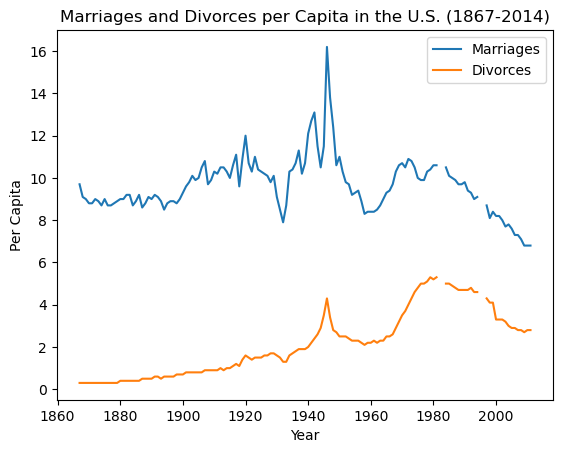

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# In this phase, we load the data
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# during thi second phase, we create a line plot
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces')

# we have to set the tables and legends and these will be done in this phase.
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()

# show the plot
plt.show()

as you can see, our axes have been labeled for clearer and easier understanding of the line plot

# Question 7

Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes

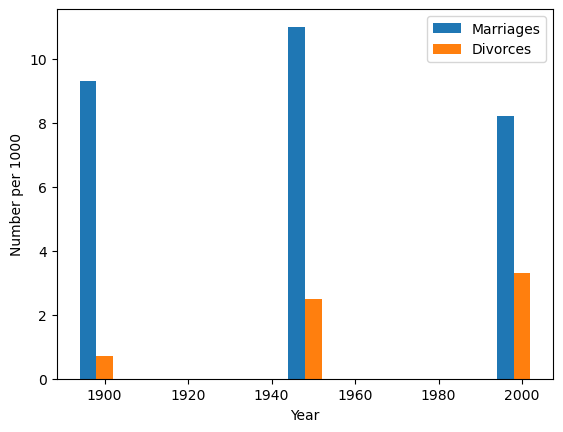

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# in our first phase, we Read  the data from CSV file
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')


# here, we Create a vertical bar chart comparing the number of marriages and divorces per capita in 1900, 1950, and 2000 and this will depict exactly what we intend to achieve
subset = data[data['Year'].isin([1900, 1950, 2000])]
plt.bar(subset['Year']-4, subset['Marriages_per_1000'], width=4, label='Marriages')
plt.bar(subset['Year'], subset['Divorces_per_1000'], width=4, label='Divorces')

#  Adding axis labels and legend
plt.xlabel('Year')
plt.ylabel('Number per 1000')
plt.legend()

# then,we Show the plot
plt.show()

from the graph above, it is evident that divorces increased steadily from 1900 to 1950 then to 2000. also, marriages peaked in 1950 but dropped significantly in 2000

# QUESTION 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.

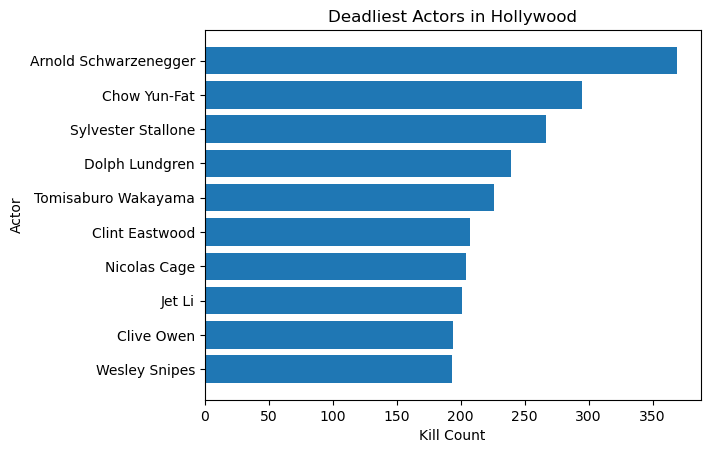

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# We Load the data into a pandas DataFrame in this section
data = pd.read_csv('actor_kill_counts.csv')

# by Sorting the data by kill count
data = data.sort_values('Count')

#in this phase, we Createa  a horizontal bar chart
plt.barh(data['Actor'], data['Count'])

# Add labels and title in this phase to enable better understanding of graph
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# Show the plot
plt.show()

from this graph it is evident that the deadliest actor is Arnold Schwarzenegger whiles the least deadliest are  Clive Owen and Wesley Snipes. sorry to the Wesley Snipes fans :)

# QUESTION 9

Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.

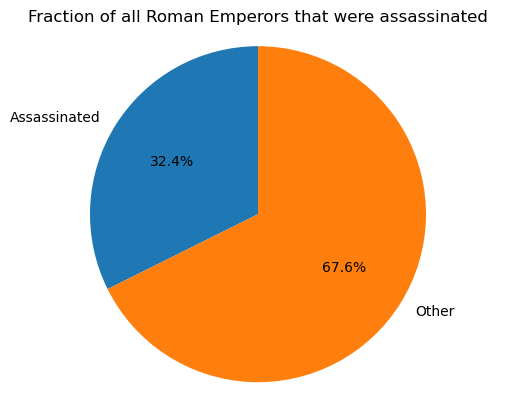

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a pandas dataframe
data = pd.read_csv('roman-emperor-reigns.csv')

# Counting the number of emperors that were assassinated in this section
assassinated = data[data['Cause_of_Death'] == 'Assassinated']['Emperor'].count()

# Count the number of emperors that died of other causes
other = data[data['Cause_of_Death'] != 'Assassinated']['Emperor'].count()

# we Create a pie chart below
labels = ['Assassinated', 'Other']
sizes = [assassinated, other]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Make the pie chart an even circle
plt.axis('equal')

# Add a title
plt.title('Fraction of all Roman Emperors that were assassinated')

# Show the chart
plt.show()

in the pie chart above, roman emperors that were assasinated amounted to 32.4% whiles other causes of their death amounted to 67.6%. this tells us that other factors that caused the death of roman emperors at the time was very huge and just a minimal amount of assasination happened as compared to other causes of their death.

# QUESTION 10

Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

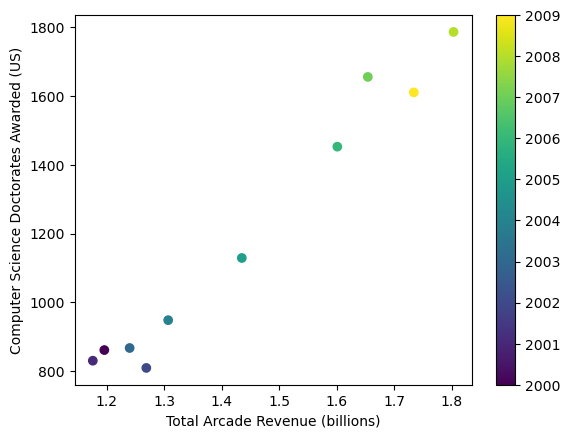

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# LoadING the data into a pandas DataFrame
data = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")

# Create a scatter plot with revenue on the x-axis, number of CS PhDs on the y-axis, and colored by year
plt.scatter(data["Total Arcade Revenue (billions)"], data["Computer Science Doctorates Awarded (US)"], c=data["Year"])

# Add labels for the x-axis and y-axis respectively
plt.xlabel("Total Arcade Revenue (billions)")
plt.ylabel("Computer Science Doctorates Awarded (US)")

# Add a colorbar to show the year values to allow for easy and better interpretattion
plt.colorbar()

# Display the plot
plt.show()

 the graph suggests that as the arcade industry grew (in terms of revenue), there was a corresponding increase in the number of computer science doctorates awarded in the US, especially in more recent years.